In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('/content/police.csv')

In [45]:
df


,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [46]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [47]:
df.shape

(91741, 15)

In [48]:
df.dtypes

,0
stop_date,object
stop_time,object
county_name,float64
driver_gender,object
driver_age_raw,float64
driver_age,float64
driver_race,object
violation_raw,object
violation,object
search_conducted,bool


In [49]:
df.isnull().sum()

,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5335
driver_age_raw,5327
driver_age,5621
driver_race,5333
violation_raw,5333
violation,5333
search_conducted,0


In [50]:
df.drop("county_name",axis = 1,inplace = True)

In [51]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [52]:
df.dropna(axis = 'columns', how = 'all')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Do men or Women speed more ofen?


In [53]:
df[df.driver_gender == 'M'].violation.value_counts(normalize=True)

,proportion
violation,
Speeding,0.524350
Moving violation,0.207012
Equipment,0.135671
Other,0.057668
Registration/plates,0.038461
Seat belt,0.036839


In [54]:
df[df.driver_gender == "F"].violation.value_counts(normalize = True)

,proportion
violation,
Speeding,0.658500
Moving violation,0.136277
Equipment,0.105780
Registration/plates,0.043086
Other,0.029348
Seat belt,0.027009


In [55]:
df.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: proportion, dtype: float64

Does gender affect who gets searched during a stop

In [56]:
df.search_conducted.value_counts(normalize= True)

,proportion
search_conducted,
False,0.965163
True,0.034837


df.search_conducted.mean()

In [58]:
df.groupby("driver_gender").search_conducted.mean()

,search_conducted
driver_gender,
F,0.020033
M,0.043326


In [59]:
df.groupby(["violation","driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

**Why is search type is  missing so often?**

In [60]:
df.isnull().sum()

,0
stop_date,0
stop_time,0
driver_gender,5335
driver_age_raw,5327
driver_age,5621
driver_race,5333
violation_raw,5333
violation,5333
search_conducted,0
search_type,88545


In [61]:
df.search_conducted.value_counts()

,count
search_conducted,
False,88545
True,3196


In [62]:
df.search_type.value_counts(dropna = False)

,count
search_type,
NaN,88545
Incident to Arrest,1219
Probable Cause,891
Inventory,220
Reasonable Suspicion,197
Protective Frisk,161
"Incident to Arrest,Inventory",129
"Incident to Arrest,Probable Cause",106
"Probable Cause,Reasonable Suspicion",75


**During search, how often is the driver frisked?**

In [63]:
df["frisk"] = df.search_type.str.contains("Protective frisk")

In [64]:
df.frisk.value_counts(dropna = False)

,count
frisk,
NaN,88545
False,3196


In [65]:
df.frisk.sum()

0

In [66]:
df.frisk.mean()

0.0

Which year had the least number of stops?

In [68]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [71]:
df.stop_date.str.slice(0,4).value_counts()

,count
stop_date,
2012,10970
2006,10639
2007,9476
2014,9228
2008,8752
2015,8599
2011,8126
2013,7924
2009,7908


In [74]:
allt = df.stop_date.str.cat(df.stop_time,sep = " ")
df["stop_datetime"] = pd.to_datetime(allt)

In [75]:
df.stop_datetime.dt.year.value_counts()

,count
stop_datetime,
2012,10970
2006,10639
2007,9476
2014,9228
2008,8752
2015,8599
2011,8126
2013,7924
2009,7908


How does drug activity change by the time of the day?

In [76]:
df.drugs_related_stop.dtype

dtype('bool')

<Axes: xlabel='stop_datetime'>

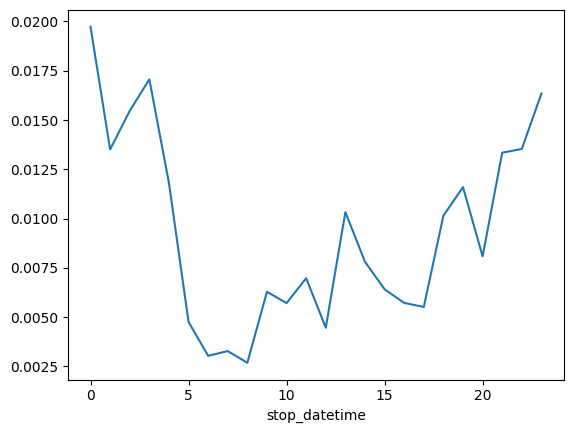

In [77]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

<Axes: xlabel='stop_datetime'>

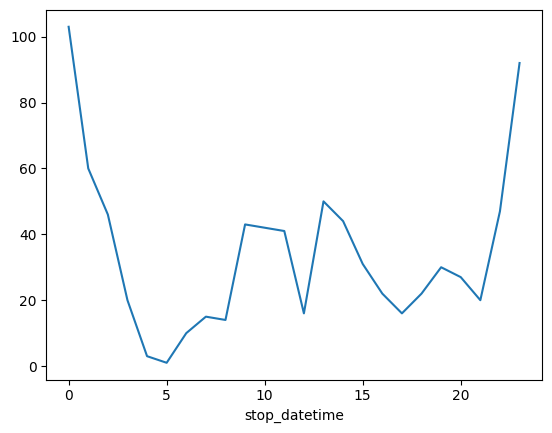

In [78]:
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

Does most stops occur at night?  

<Axes: xlabel='stop_datetime'>

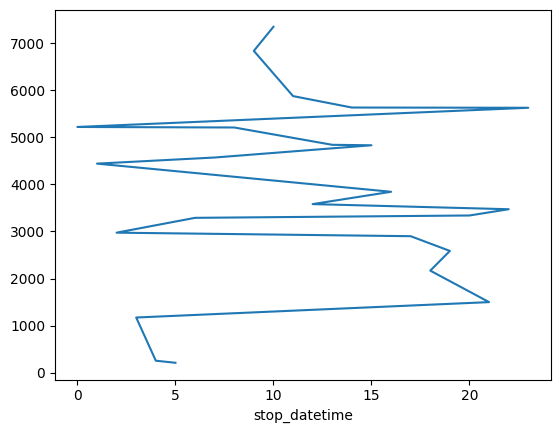

In [79]:
df.stop_datetime.dt.hour.value_counts().plot()

Gotta do the sorting when plotting

<Axes: xlabel='stop_datetime'>

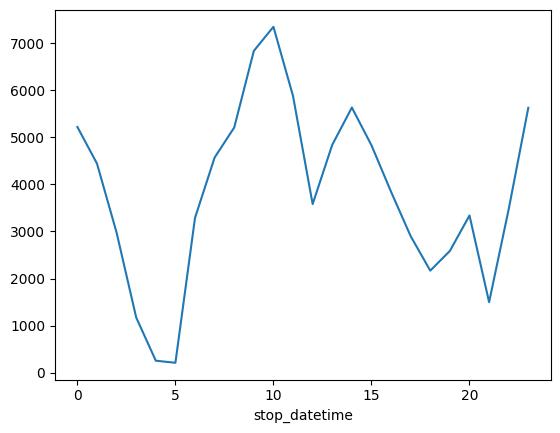

In [80]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

Bad data in stop_duration column and fixing it

In [81]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [82]:
df.stop_duration.value_counts(dropna = False)

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
NaN,5333
30+ Min,3228
2,1
1,1


In [84]:
df.stop_duration.value_counts()

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
30+ Min,3228
2,1
1,1


In [85]:
df.loc[(df.stop_duration == "1") | (df.stop_duration == "2"), "stop_duration"] = "Nan"

In [86]:
df.stop_duration.value_counts(dropna = False)

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
NaN,5333
30+ Min,3228
Nan,2


In [93]:
import numpy as np
df.loc[df.stop_duration == "Nan","stop_duration"] = np.nan

In [94]:
df.stop_duration.value_counts(dropna = False)

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
NaN,5335
30+ Min,3228


In [95]:
df.stop_duration.replace(["1", "2"],value = np.nan,inplace = True)

<ipython-input-95-46373fef0186>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.stop_duration.replace(["1", "2"],value = np.nan,inplace = True)


In [96]:
df.stop_duration.value_counts(dropna = False)

,count
stop_duration,
0-15 Min,69543
16-30 Min,13635
NaN,5335
30+ Min,3228


**The mean of stop_Duration for each violation_raw**

In [97]:
mp = {'0-15 Min':8,'16-30 Min':23,'30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mp)

In [98]:
df.stop_minutes.value_counts()

,count
stop_minutes,
8.0,69543
23.0,13635
45.0,3228


In [99]:
df.groupby('violation_raw').stop_minutes.mean()

,stop_minutes
violation_raw,
APB,20.987342
Call for Service,22.034669
Equipment/Inspection Violation,11.460345
Motorist Assist/Courtesy,16.916256
Other Traffic Violation,13.900265
Registration Violation,13.745629
Seatbelt Violation,9.741531
Special Detail/Directed Patrol,15.061100
Speeding,10.577690


In [100]:
df.groupby('violation_raw').stop_minutes.agg(['mean','count'])


,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


**Plotting the result of groupby above**

<Axes: xlabel='violation_raw'>

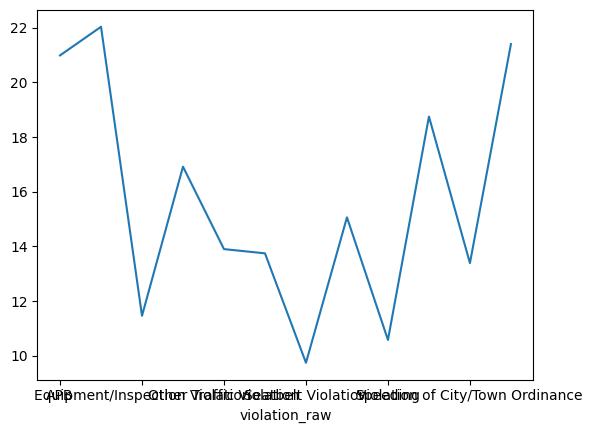

In [101]:
df.groupby('violation_raw').stop_minutes.mean().plot()

<Axes: xlabel='violation_raw'>

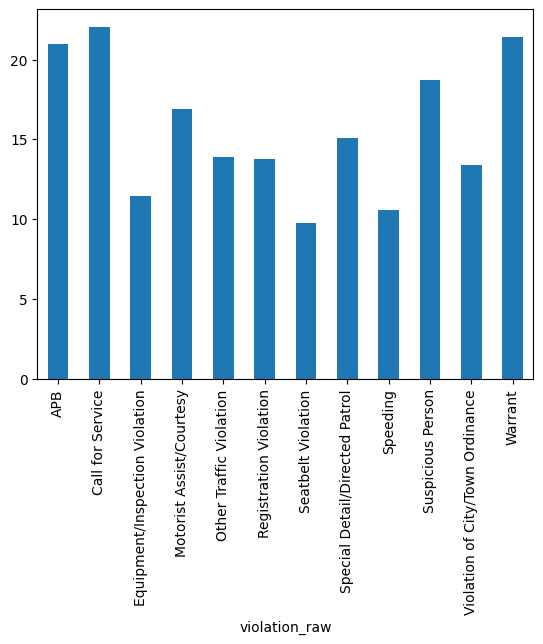

In [102]:
df.groupby('violation_raw').stop_minutes.mean().plot(kind = 'bar')

<Axes: xlabel='violation_raw'>

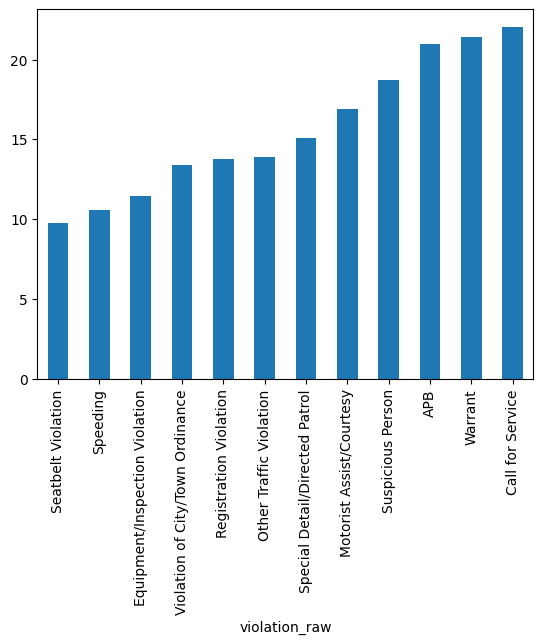

In [104]:
df.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind = 'bar')

Comparing age distrubitions for each violations

In [105]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


<Axes: ylabel='Frequency'>

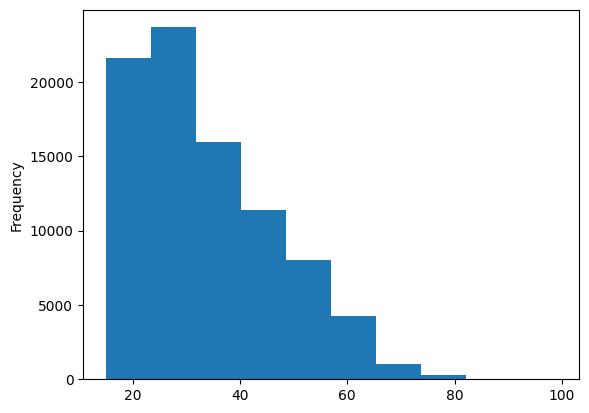

In [106]:
df.driver_age.plot(kind = 'hist')

<Axes: xlabel='driver_age'>

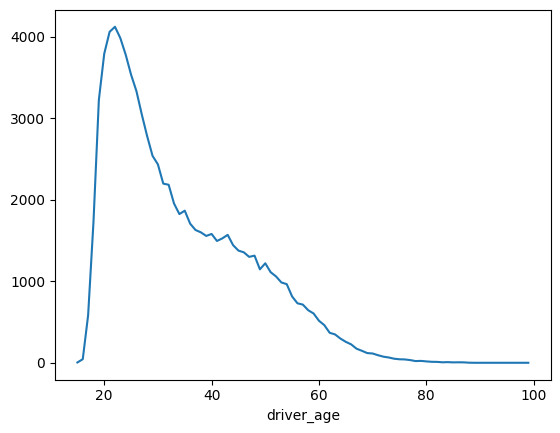

In [108]:
df.driver_age.value_counts().sort_index().plot()

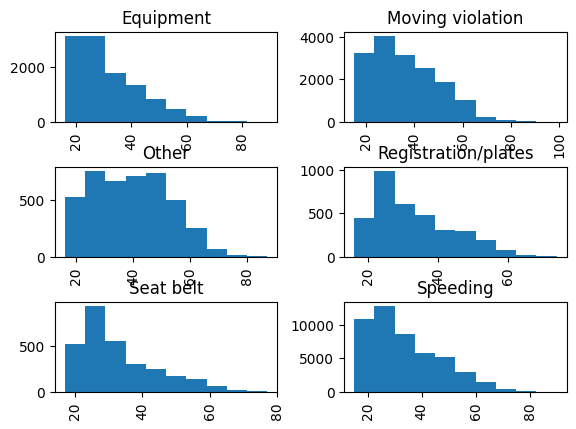

In [110]:
df.hist('driver_age', by = 'violation')
plt.show()

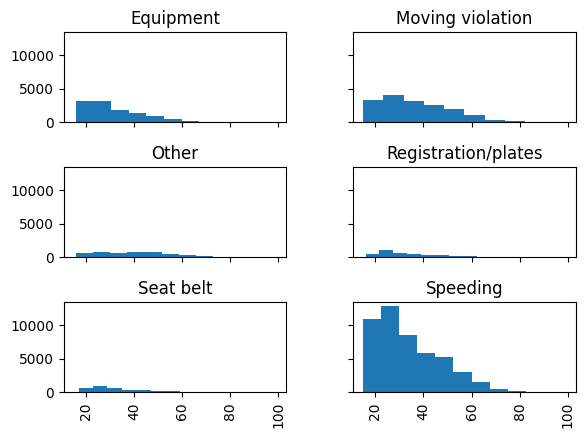

In [112]:
df.hist('driver_age',by = 'violation',sharex = True , sharey = True)
plt.show()

In [113]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


**What if we didnt have driver_Age column we can use driver_age_raw to create that column**

<function matplotlib.pyplot.show(close=None, block=None)>

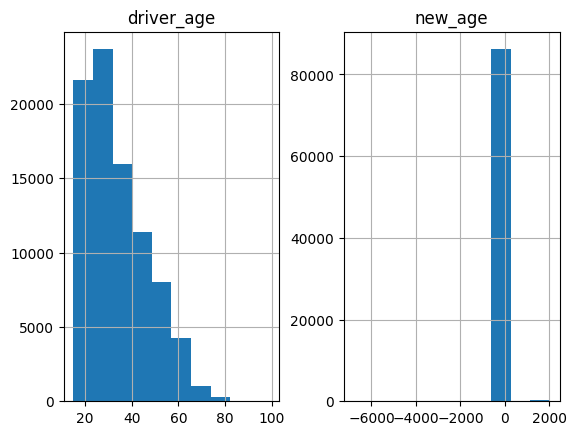

In [115]:
df['new_age'] = df.stop_datetime.dt.year - df.driver_age_raw
df[['driver_age', 'new_age']].hist()
plt.show

In [116]:
df[['driver_age','new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [117]:
df[(df.new_age < 15) | (df.new_age > 99 )].shape

(294, 18)

In [118]:
df.driver_age_raw.isnull().sum()

5327

In [119]:
5621 - 5327

294

In [122]:
df[(df.driver_age_raw.notnull() & (df.driver_age.isnull()))].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [123]:
df.loc[(df.new_age<15) | (df.new_age > 99),'new_age'] = np.nan
df.new_age.equals(df.driver_age)

True

In [124]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0,20.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0,40.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0,33.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0,19.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0,21.0
